In [245]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical

%load_ext tensorboard
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [247]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.mnist.load_data()

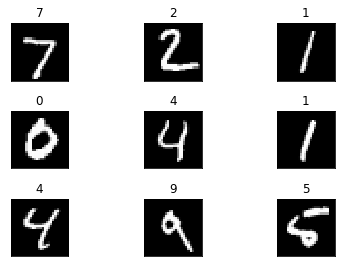

In [248]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(test_images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(test_labels[i])

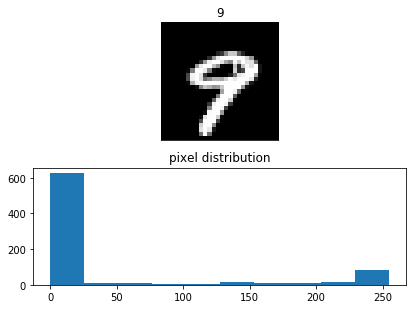

In [249]:
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.tight_layout()
    plt.imshow(test_images[9], cmap='gray')
    plt.title(test_labels[9])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2,1,2)
    plt.hist(test_images[9].reshape(784))
    plt.title('pixel distribution')
    plt.show()

In [250]:
print("train images shape", train_images.shape)
print("train labels shape", train_labels.shape)

print("test images shape", test_images.shape)
print("test labels shape", test_labels.shape)

train images shape (60000, 28, 28)
train labels shape (60000,)
test images shape (10000, 28, 28)
test labels shape (10000,)


In [251]:
# let us reshape the images from 28*28 2d to 1d vector
train_images = train_images.reshape(60000,28*28)
test_images = test_images.reshape(10000,28*28)

In [252]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [253]:
test_images = test_images/255
train_images = train_images/255

In [254]:
print("train images shape", train_images.shape)
print("train labels shape", train_labels.shape)

print("test images shape", test_images.shape)
print("test labels shape", test_labels.shape)

train images shape (60000, 784)
train labels shape (60000,)
test images shape (10000, 784)
test labels shape (10000,)


In [255]:

print("train labels shape before one hot encoding {}".format(train_labels.shape))
print("test labels shape before one hot encoding {}".format(test_labels.shape))

num_classes = 10
train_labels  = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

print("train labels shape after one hot encoding {} ".format(train_labels.shape))
print("test labels shape after one hot encoding {}".format(test_labels.shape))

train labels shape before one hot encoding (60000,)
test labels shape before one hot encoding (10000,)
train labels shape after one hot encoding (60000, 10) 
test labels shape after one hot encoding (10000, 10)


In [256]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [257]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [258]:
model = Sequential()
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [259]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [260]:
log_dir = "logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(train_images,train_labels,epochs=30,validation_split=0.2,callbacks=[tensorboard_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 5s 99us/sample - loss: 0.6777 - accuracy: 0.8166 - val_loss: 0.3281 - val_accuracy: 0.9078
Epoch 2/30
48000/48000 [==============================] - 4s 78us/sample - loss: 0.2999 - accuracy: 0.9135 - val_loss: 0.2475 - val_accuracy: 0.9297
Epoch 3/30
48000/48000 [==============================] - 4s 80us/sample - loss: 0.2377 - accuracy: 0.9327 - val_loss: 0.2062 - val_accuracy: 0.9432
Epoch 4/30
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1977 - accuracy: 0.9429 - val_loss: 0.1824 - val_accuracy: 0.9488
Epoch 5/30
48000/48000 [==============================] - 4s 75us/sample - loss: 0.1677 - accuracy: 0.9517 - val_loss: 0.1645 - val_accuracy: 0.9537
Epoch 6/30
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1451 - accuracy: 0.9581 - val_loss: 0.1442 - val_accuracy: 0.9582
Epoch 7/30
48000/48000 [==============================] 

In [261]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 18520), started 0:16:57 ago. (Use '!kill 18520' to kill it.)